In [1]:
import torch
import numpy as np
from model import *
from train import *

device=torch.device('cuda')

In [10]:
featureClass={0:"mfccPadData.npy",1:"mfccmeanData.npy"}
labelClass={0:"labelBinary.npy",1:"labelMulti.npy",2:"labelWho.npy"}

In [25]:
class myDatasetWhoPad(torch.utils.data.Dataset):
    def __init__(self,flag,feature):
        #flag [0 train,1 test]
        self.df=np.load('data/'+featureClass[feature],allow_pickle=True)
        self.labels=np.load('data/'+labelClass[2],allow_pickle=True)
        LabelTypes=15
        data=[[]for i in range(LabelTypes)]
        for i in range(len(self.df)):
            data[self.labels[i][0]].append(self.df[i])
        self.borders=[[0,int(len(data[i])*0.7),int(len(data[i]))] for i in range(LabelTypes)]
        dataBinary=np.array(data)
        data_df=[[]for i in range(LabelTypes)]
        lables=[[]for i in range(LabelTypes)]
        for i in range(0,LabelTypes):
            for j in range(self.borders[i][flag],self.borders[i][flag+1]):
                data_df[i].append(dataBinary[i][j])
                lables[i].append(i)

        if flag==0:
            maxnumber=max([len(i) for i in data_df])
            data_df_enh=[]
            lables_enh=[]
            for i in range(LabelTypes):
                data_df_enh.append(data_df[i])
                lables_enh.append(lables[i])

            self.data_df=np.array(np.concatenate(data_df_enh,axis=0))
            self.lables=np.array(np.concatenate(lables_enh,axis=0))
        else :
            self.data_df=np.array(np.concatenate(data_df,axis=0))
            self.lables=np.array(np.concatenate(lables,axis=0) )            
        
    def __getitem__(self, index):
        return  self.data_df[index],self.lables[index]
    def __len__(self):
        return len(self.data_df)

In [31]:
class myDatasetWhoPad(torch.utils.data.Dataset):
    def __init__(self,flag,feature):
        #flag [0 train,1 test]
        self.df=np.load('data/'+featureClass[feature],allow_pickle=True)
        self.labels=np.load('data/'+labelClass[2],allow_pickle=True)
        LabelTypes=15
        data=[[]for i in range(LabelTypes)]
        for i in range(len(self.df)):
            data[self.labels[i][0]].append(self.df[i])
        self.borders=[[0,int(len(data[i])*0.7),int(len(data[i]))] for i in range(LabelTypes)]
        dataBinary=np.array(data)
        data_df=[[]for i in range(LabelTypes)]
        lables=[[]for i in range(LabelTypes)]
        for i in range(0,LabelTypes):
            for j in range(self.borders[i][flag],self.borders[i][flag+1]):
                data_df[i].append(dataBinary[i][j])
                lables[i].append(i)
        if flag==0:
            maxnumber=max([len(i) for i in data_df])
            data_df_enh=[]
            lables_enh=[]
            for i in range(LabelTypes):
                data_df_enh.append(np.repeat(data_df[i],maxnumber//len(data_df[i]),axis=0))
                lables_enh.append(np.repeat(lables[i],maxnumber//len(data_df[i]),axis=0))

            self.data_df=np.array(np.concatenate(data_df_enh,axis=0))
            self.lables=np.array(np.concatenate(lables_enh,axis=0))
        else :
            self.data_df=np.array(np.concatenate(data_df,axis=0))
            self.lables=np.array(np.concatenate(lables,axis=0) ) 
        
    def __getitem__(self, index):
        return  self.data_df[index],self.lables[index]
    def __len__(self):
        return len(self.data_df)

<ipython-input-31-5da2f94fbf02>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataBinary=np.array(data)


Train Epoch: 1 cost time: 0.712 train_loss 272.232 accuracy 7.08%
Epoch: 1 cost time: 0.1203 test_loss 2.6997 test accuracy 3.91%
 
Train Epoch: 2 cost time: 0.506 train_loss 2.678 accuracy 7.86%
Epoch: 2 cost time: 0.1415 test_loss 2.6894 test accuracy 10.86%
 
Train Epoch: 3 cost time: 0.488 train_loss 2.649 accuracy 9.40%
Epoch: 3 cost time: 0.1262 test_loss 2.6639 test accuracy 9.59%
 
Train Epoch: 4 cost time: 0.540 train_loss 2.620 accuracy 10.28%
Epoch: 4 cost time: 0.1266 test_loss 3.2838 test accuracy 4.19%
 
Train Epoch: 5 cost time: 0.566 train_loss 2.717 accuracy 6.77%
Epoch: 5 cost time: 0.1251 test_loss 2.7074 test accuracy 9.82%
 
Train Epoch: 6 cost time: 0.577 train_loss 2.705 accuracy 6.79%
Epoch: 6 cost time: 0.1315 test_loss 2.7067 test accuracy 9.82%
 
Train Epoch: 7 cost time: 0.531 train_loss 2.704 accuracy 6.96%
Epoch: 7 cost time: 0.1231 test_loss 2.7062 test accuracy 3.85%
 
Train Epoch: 8 cost time: 0.546 train_loss 2.704 accuracy 7.92%
Epoch: 8 cost time: 0.

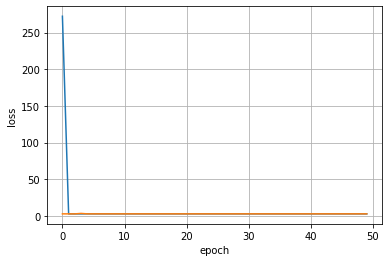

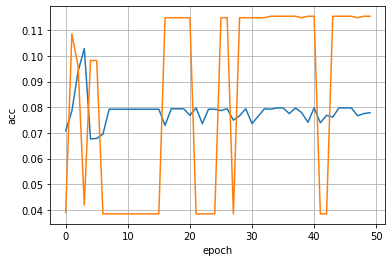

Confusion Matrix:
[[  0   0  88   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  70   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 201   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  57   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 152   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 130   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 200   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 171   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 182   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  67   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  71   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0  59   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  55   0   0   0   0   0   0   0   0   0   0   0   0]]


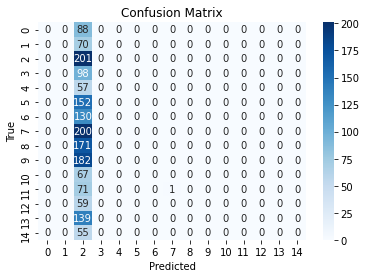

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        88
         1.0       0.00      0.00      0.00        70
         2.0       0.12      1.00      0.21       201
         3.0       0.00      0.00      0.00        98
         4.0       0.00      0.00      0.00        57
         5.0       0.00      0.00      0.00       152
         6.0       0.00      0.00      0.00       130
         7.0       0.00      0.00      0.00       200
         8.0       0.00      0.00      0.00       171
         9.0       0.00      0.00      0.00       182
        10.0       0.00      0.00      0.00        67
        11.0       0.00      0.00      0.00        72
        12.0       0.00      0.00      0.00        59
        13.0       0.00      0.00      0.00       139
        14.0       0.00      0.00      0.00        55

    accuracy                           0.12      1741
   macro avg       0.01      0.07      0.01      1741
wei

C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
def dataset_read(batch_size,flag,feature=0):
    data_set=myDatasetWhoPad(0,0)
    train_loader=DataLoader(data_set,batch_size=batch_size,shuffle=True)
    test_set=myDatasetWhoPad(1,0)
    test_loader=DataLoader(test_set,batch_size=batch_size,shuffle=True)
    return train_loader,test_loader
class mlp(torch.nn.Module):
    def __init__(self,c_out):
        super(mlp, self).__init__()
        self.flatten=torch.nn.Flatten(1)
        self.fc=torch.nn.Linear(40*706,200)
        self.fc2=torch.nn.Linear(200,c_out) 
    def forward(self,x):
        out=self.flatten(x)
        out=torch.relu(self.fc(out))
        out=self.fc2(out)
        return out
c_out=15

epochs=50
batch_size=128

model=mlp(c_out).to(device)
name='who_mlp_mfcc'
train_loader,test_loader=dataset_read(batch_size,flag=0)#1:multiclass,0 binary

train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab=train(model,epochs,train_loader,test_loader,device)

save_result(name,[train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab])
plot_epoch(train_loss_list,test_loss_list,train_acc_list,test_acc_list,name)
confusion_matrix_plot_Report(y_lab[-1], y_pre[-1],name)

<ipython-input-31-5da2f94fbf02>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataBinary=np.array(data)


Train Epoch: 1 cost time: 0.194 train_loss 96.643 accuracy 12.59%
Epoch: 1 cost time: 0.0209 test_loss 16.8682 test accuracy 23.89%
 
Train Epoch: 2 cost time: 0.129 train_loss 9.099 accuracy 37.42%
Epoch: 2 cost time: 0.0211 test_loss 6.1240 test accuracy 31.76%
 
Train Epoch: 3 cost time: 0.123 train_loss 5.240 accuracy 44.68%
Epoch: 3 cost time: 0.0183 test_loss 18.3959 test accuracy 31.71%
 
Train Epoch: 4 cost time: 0.119 train_loss 7.961 accuracy 38.38%
Epoch: 4 cost time: 0.0201 test_loss 8.4217 test accuracy 27.23%
 
Train Epoch: 5 cost time: 0.121 train_loss 5.395 accuracy 46.72%
Epoch: 5 cost time: 0.0207 test_loss 14.1699 test accuracy 28.43%
 
Train Epoch: 6 cost time: 0.113 train_loss 5.444 accuracy 50.81%
Epoch: 6 cost time: 0.0192 test_loss 6.0842 test accuracy 29.29%
 
Train Epoch: 7 cost time: 0.100 train_loss 4.663 accuracy 50.14%
Epoch: 7 cost time: 0.0200 test_loss 11.5260 test accuracy 26.08%
 
Train Epoch: 8 cost time: 0.093 train_loss 6.160 accuracy 47.90%
Epoch:

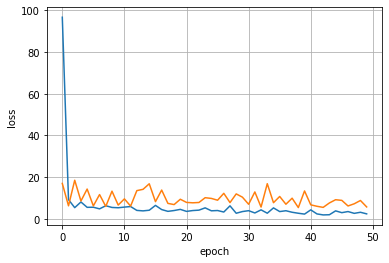

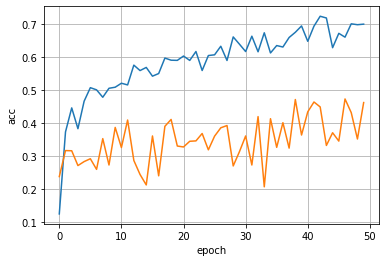

Confusion Matrix:
[[ 85   0   0   0   0   1   1   0   0   0   0   0   0   1   0]
 [  0  53   0   0   1   4   0   1   0   3   0   6   0   2   0]
 [  0   0  17  10   0 110   0  19   0  34   0   0   0   2   9]
 [  0   0   1  52   1  25   0   0   0  17   0   0   0   2   0]
 [  0   0   0   0  47   3   0   1   0   3   0   1   0   2   0]
 [  0   0   2   7   0 117   0   4   0  14   0   1   1   5   1]
 [  1   0   0   0   0  11  30  16   0  35   4   0   4  20   9]
 [  0   2   0   0   0  24   0  79   0  73   0   0   0  22   0]
 [  0   0   3   4   0  37   0  21   0 101   0   0   0   2   3]
 [  1   0   0   0   1  13   0  17   0 133   1  11   4   1   0]
 [  2   0   0   1   3  10   1   9   6  17  12   0   0   5   1]
 [  2   0   0   0   4   1   0   1   1   1   0  62   0   0   0]
 [  1   0   1   1   1  18   0  10   0  23   0   0   3   0   1]
 [  1   0   0   1   0  13   2   6   0  13   0   0   0  99   4]
 [  0   0   0   0   0  13   0  12   0   5   0   1   0   7  17]]


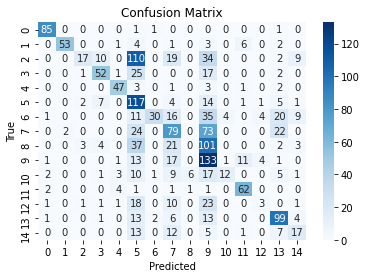

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        88
         1.0       0.96      0.76      0.85        70
         2.0       0.71      0.08      0.15       201
         3.0       0.68      0.53      0.60        98
         4.0       0.81      0.82      0.82        57
         5.0       0.29      0.77      0.42       152
         6.0       0.88      0.23      0.37       130
         7.0       0.40      0.40      0.40       200
         8.0       0.00      0.00      0.00       171
         9.0       0.28      0.73      0.41       182
        10.0       0.71      0.18      0.29        67
        11.0       0.76      0.86      0.81        72
        12.0       0.25      0.05      0.08        59
        13.0       0.58      0.71      0.64       139
        14.0       0.38      0.31      0.34        55

    accuracy                           0.46      1741
   macro avg       0.57      0.49      0.47      1741
wei

In [33]:
def dataset_read(batch_size,flag,feature=0):
    data_set=myDatasetWhoPad(0,1)
    train_loader=DataLoader(data_set,batch_size=batch_size,shuffle=True)
    test_set=myDatasetWhoPad(1,1)
    test_loader=DataLoader(test_set,batch_size=batch_size,shuffle=True)
    return train_loader,test_loader
class mlp(torch.nn.Module):
    def __init__(self,c_out):
        super(mlp, self).__init__()
        self.flatten=torch.nn.Flatten(1)
        self.fc=torch.nn.Linear(13,2048)
        self.fc2=torch.nn.Linear(2048,c_out) 
    def forward(self,x):
        out=self.flatten(x)
        out=torch.relu(self.fc(out))
        out=self.fc2(out)
        return out
c_out=15

epochs=50
batch_size=128

model=mlp(c_out).to(device)
name='who_mlp_mfccm'
train_loader,test_loader=dataset_read(batch_size,flag=0)#1:multiclass,0 binary

train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab=train(model,epochs,train_loader,test_loader,device)

save_result(name,[train_loss_list,test_loss_list,train_acc_list,test_acc_list,y_pre,y_lab])
plot_epoch(train_loss_list,test_loss_list,train_acc_list,test_acc_list,name)
confusion_matrix_plot_Report(y_lab[-1], y_pre[-1],name)